## Singapore Rainfall data for the location (1.30◦N,103.68◦E), collected in year 2010 from ground-based sky imager.
Initial Ploting and Data Parsing.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("imagerdata.csv", header=None, names=["day", "hour", "minute", "rainfall_rate"])
print(dataframe.head())

   day  hour  minute  rainfall_rate
0    1     0       0              0
1    1     0       1              0
2    1     0       2              0
3    1     0       3              0
4    1     0       4              0


In [3]:
# Parsing the Dates
dataframe['date']=pd.to_datetime(dataframe['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date
dataframe['timestamp'] = dataframe['date'] + pd.to_timedelta(dataframe['hour'].astype('str') + ':' + dataframe['minute'].astype('str') + ':00') # append the timedelta in hours and minutes to get the full timestamp
dataframe.set_index('timestamp', inplace=True)

In [4]:
# dataframe.head()
dataframe.tail()

,day,hour,minute,rainfall_rate,date
timestamp,,,,,
2010-12-31 23:55:00,365,23,55,0,2010-12-31
2010-12-31 23:56:00,365,23,56,0,2010-12-31
2010-12-31 23:57:00,365,23,57,0,2010-12-31
2010-12-31 23:58:00,365,23,58,0,2010-12-31
2010-12-31 23:59:00,365,23,59,0,2010-12-31


In [5]:
# Complicated
# def parse_date(day):
#     start = datetime(2009,12,31)
#     delta = timedelta(days=int(day))
#     new_date = start + delta
#     return new_date
# dataframe['date'] = dataframe['day'].astype(str).map(parse_date)

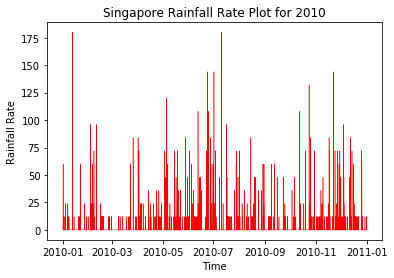

In [6]:
plt.plot(dataframe.index.values, dataframe['rainfall_rate'], linewidth=0.5, color='r')
plt.title('Singapore Rainfall Rate Plot for 2010')
plt.xlabel('Time')
plt.ylabel('Rainfall Rate')
plt.show()

In [7]:
dataframe.tail()

,day,hour,minute,rainfall_rate,date
timestamp,,,,,
2010-12-31 23:55:00,365,23,55,0,2010-12-31
2010-12-31 23:56:00,365,23,56,0,2010-12-31
2010-12-31 23:57:00,365,23,57,0,2010-12-31
2010-12-31 23:58:00,365,23,58,0,2010-12-31
2010-12-31 23:59:00,365,23,59,0,2010-12-31


### Calculate the daily rainfall rate.
For this `Group-By` is to be used for grouping together based on the day for each month.

In [16]:
time_index = dataframe.index # timestamps are extracted.
daily_groups = dataframe.groupby([time_index.month,time_index.day]) # grouping based on the month and day.

In [17]:
daily_groups.get_group((1,1))['rainfall_rate'].sum()

1080

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 00:01:00',
               '2010-01-01 00:02:00', '2010-01-01 00:03:00',
               '2010-01-01 00:04:00', '2010-01-01 00:05:00',
               '2010-01-01 00:06:00', '2010-01-01 00:07:00',
               '2010-01-01 00:08:00', '2010-01-01 00:09:00',
               ...
               '2010-12-31 23:50:00', '2010-12-31 23:51:00',
               '2010-12-31 23:52:00', '2010-12-31 23:53:00',
               '2010-12-31 23:54:00', '2010-12-31 23:55:00',
               '2010-12-31 23:56:00', '2010-12-31 23:57:00',
               '2010-12-31 23:58:00', '2010-12-31 23:59:00'],
              dtype='datetime64[ns]', name='timestamp', length=525600, freq=None)